<a href="https://colab.research.google.com/github/Rachit23110261/ML_Assignment_3_23110261_23110189_23110306/blob/main/ML_assignment_3_question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8144 - loss: 0.6230 - val_accuracy: 0.9424 - val_loss: 0.1881
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9492 - loss: 0.1754 - val_accuracy: 0.9577 - val_loss: 0.1454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9574 - loss: 0.1374 - val_accuracy: 0.9621 - val_loss: 0.1293
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9662 - loss: 0.1136 - val_accuracy: 0.9645 - val_loss: 0.1169
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9703 - loss: 0.0985 - val_accuracy: 0.9690 - val_loss: 0.1122
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9735 - loss: 0.0878 - val_accuracy: 0.9685 - val_loss: 0.1088
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9761 - loss: 0.0759 - val_accuracy: 0.9667 - val_loss: 0.1191
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0732 - 

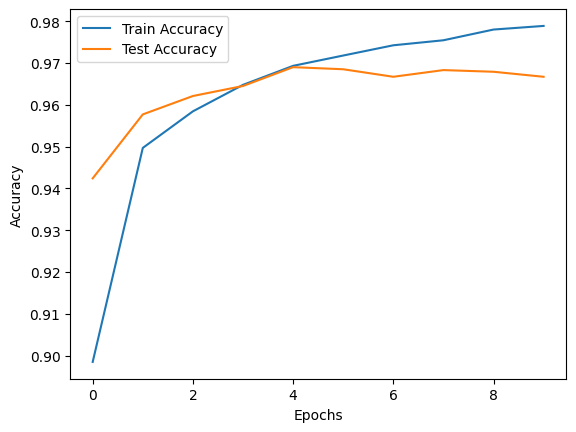

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


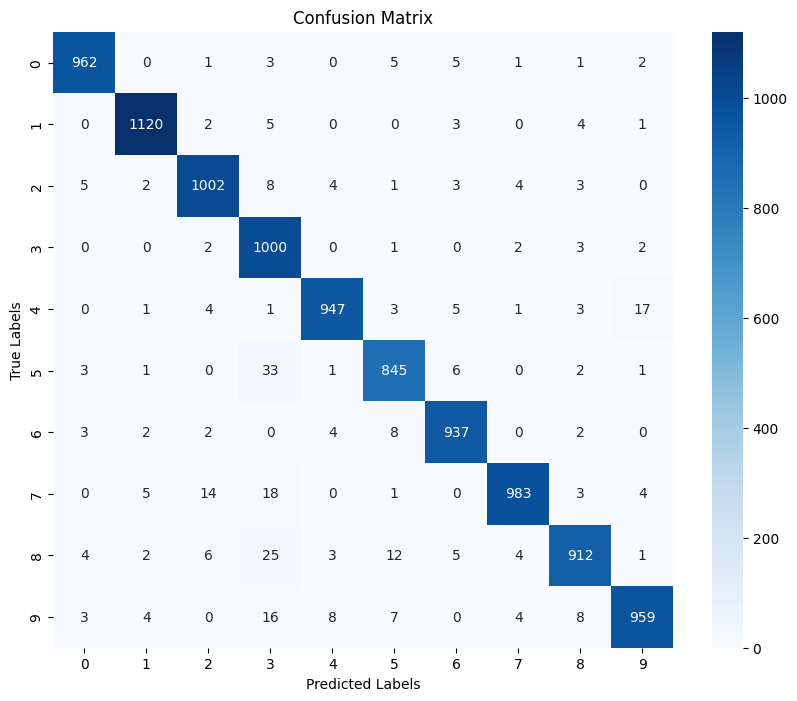

F1-Score: 0.9667806193490344


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and Preprocess MNIST Dataset
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors of 784 features
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels (for 10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Define MLP Architecture
model = models.Sequential()
# First hidden layer with 30 neurons
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
# Second hidden layer with 20 neurons
model.add(layers.Dense(20, activation='relu'))
# Output layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Step 6: Plot the Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Get predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Calculate F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1-Score: {f1}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8211 - loss: 0.6231 - val_accuracy: 0.9439 - val_loss: 0.1954
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9422 - loss: 0.1975 - val_accuracy: 0.9470 - val_loss: 0.1731
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9533 - loss: 0.1550 - val_accuracy: 0.9576 - val_loss: 0.1440
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9607 - loss: 0.1304 - val_accuracy: 0.9621 - val_loss: 0.1316
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9630 - loss: 0.1206 - val_accuracy: 0.9605 - val_loss: 0.1347
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9678 - loss: 0.1024 - val_accuracy: 0.9639 - val_loss: 0.1276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9717 - loss: 0.0907 - val_accuracy: 0.9644 - val_loss: 0.1238
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0865 - 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.9268


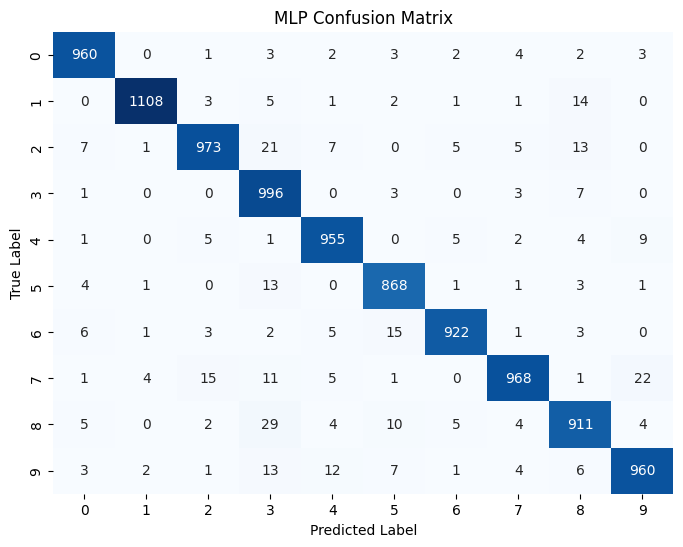

MLP F1-Score: 0.9621515529442711



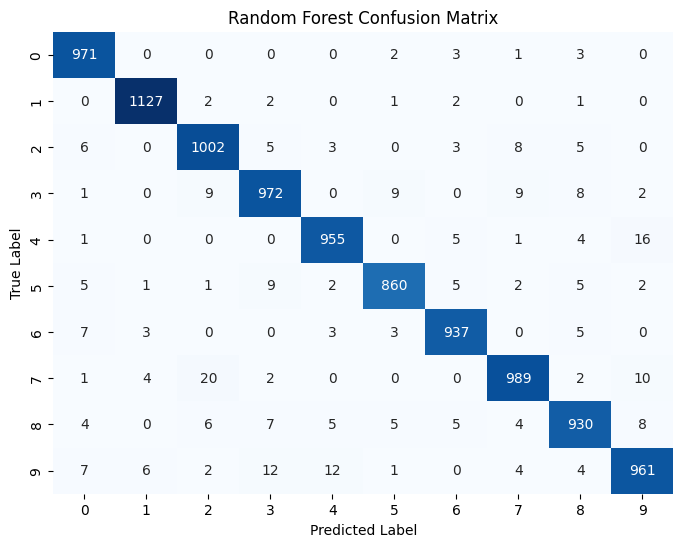

Random Forest F1-Score: 0.9703722598097009



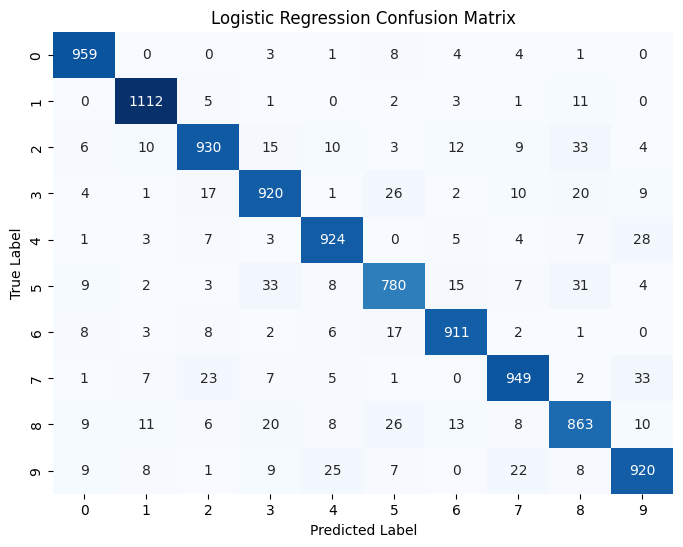

Logistic Regression F1-Score: 0.9266361914125759



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images (scale pixel values to [0, 1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images into 1D vectors of size 28x28 = 784
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels for MLP (Keras model expects one-hot encoded labels)
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

### MLP Training

# Define the MLP model
mlp_model = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=(784,)),  # First hidden layer with 30 neurons
    layers.Dense(20, activation='relu'),  # Second hidden layer with 20 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one per class)
])

# Compile the model using Adam optimizer and categorical cross-entropy loss
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(X_train_flat, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_onehot))

# Evaluate the MLP model on the test set
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test_flat, y_test_onehot, verbose=2)
print(f'MLP Test Accuracy: {mlp_test_acc}')

# Get MLP predictions and evaluate performance
y_pred_mlp = np.argmax(mlp_model.predict(X_test_flat), axis=1)

### Random Forest Training

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

# Predict on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test_flat)

# Evaluate Random Forest accuracy
rf_test_acc = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Test Accuracy: {rf_test_acc}')

### Logistic Regression Training

# Train a Logistic Regression model (you may use a subset for faster training)
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train_flat, y_train)

# Predict on the test set using Logistic Regression
y_pred_lr = lr_model.predict(X_test_flat)

# Evaluate Logistic Regression accuracy
lr_test_acc = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Test Accuracy: {lr_test_acc}')

### Evaluation: Confusion Matrix and F1-Score for All Models

def evaluate_model(y_true, y_pred, model_name):
    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # F1-score (weighted)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f'{model_name} F1-Score: {f1}\n')

# MLP evaluation
evaluate_model(y_test, y_pred_mlp, "MLP")

# Random Forest evaluation
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Logistic Regression evaluation
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8004 - loss: 0.6590 - val_accuracy: 0.9374 - val_loss: 0.2097
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9414 - loss: 0.1981 - val_accuracy: 0.9525 - val_loss: 0.1582
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9529 - loss: 0.1567 - val_accuracy: 0.9577 - val_loss: 0.1445
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1275 - val_accuracy: 0.9603 - val_loss: 0.1381
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9648 - loss: 0.1143 - val_accuracy: 0.9635 - val_loss: 0.1225
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9708 - loss: 0.0955 - val_accuracy: 0.9623 - val_loss: 0.1279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9721 - loss: 0.0907 - val_accuracy: 0.9657 - val_loss: 0.1167
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/

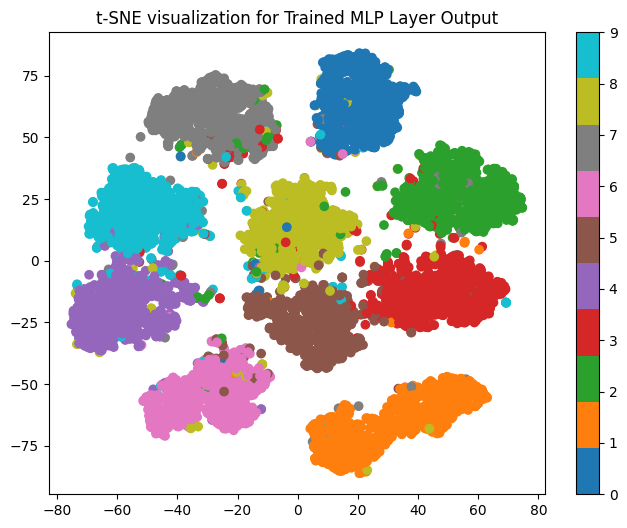

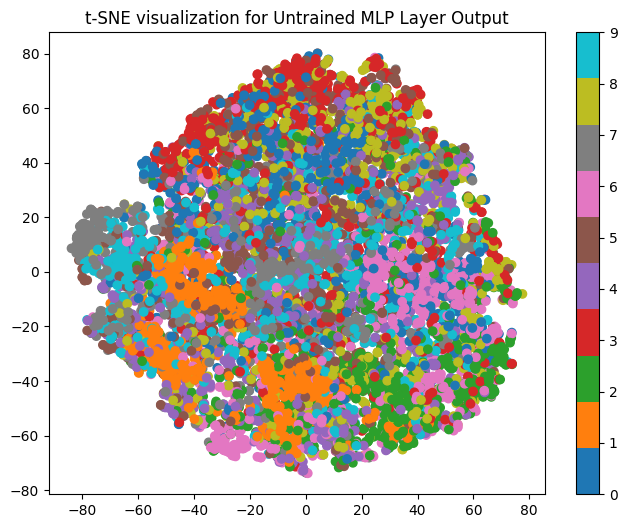

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Redefine MLP model using Input() explicitly
input_layer = Input(shape=(784,))
x = Dense(30, activation='relu')(input_layer)  # First hidden layer
x = Dense(20, activation='relu')(x)            # Second hidden layer (this is what we'll visualize)
output_layer = Dense(10, activation='softmax')(x)  # Output layer

# Now define the model
mlp_model = Model(inputs=input_layer, outputs=output_layer)
intermediate_layer_model = Model(inputs=mlp_model.input, outputs=mlp_model.layers[2].output)
trained_layer_output = intermediate_layer_model.predict(X_test_flat)
tsne = TSNE(n_components=2, random_state=42)
untrained_tsne_output = tsne.fit_transform(trained_layer_output)
# Step 2: Compile and train the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train_flat, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_onehot))

# Step 3: Define a model to extract outputs from the second hidden layer (20 neurons)
intermediate_layer_model = Model(inputs=mlp_model.input, outputs=mlp_model.layers[2].output)

# Step 4: Get the output from the second hidden layer for the test set
trained_layer_output = intermediate_layer_model.predict(X_test_flat)

# Step 5: Perform t-SNE on the output from the trained second hidden layer
tsne = TSNE(n_components=2, random_state=42)
trained_tsne_output = tsne.fit_transform(trained_layer_output)
# Step 6: Plot t-SNE for trained model
plt.figure(figsize=(8, 6))

# Assuming y_test is already in integer label format (0-9)
plt.scatter(trained_tsne_output[:, 0], trained_tsne_output[:, 1], c=y_test, cmap='tab10')  # No need for np.argmax here
plt.colorbar()
plt.title('t-SNE visualization for Trained MLP Layer Output')
plt.show()

# Step 11: Plot t-SNE for untrained model
plt.figure(figsize=(8, 6))
plt.scatter(untrained_tsne_output[:, 0], untrained_tsne_output[:, 1], c=y_test, cmap='tab10')  # No need for np.argmax here
plt.colorbar()
plt.title('t-SNE visualization for Untrained MLP Layer Output')
plt.show()


In [ ]:
# Step 1: Load and Preprocess Fashion-MNIST Dataset
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize images to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors of 784 features (28x28 images)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels (for 10 classes in Fashion-MNIST)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


313/313 - 1s - 3ms/step - accuracy: 0.8681 - loss: 0.3697

Test accuracy: 0.8680999875068665
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


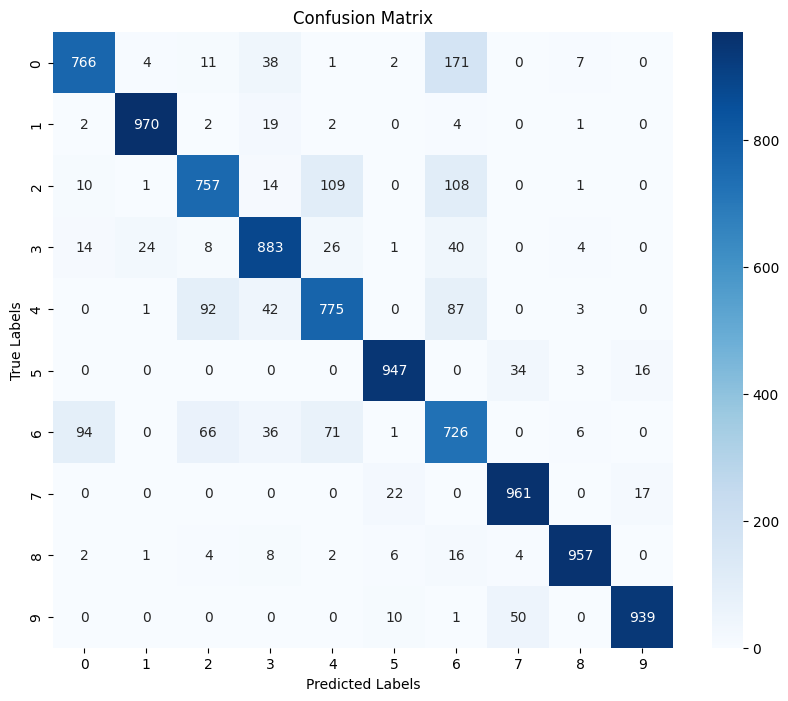

F1-Score: 0.8690205340753328


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load and Preprocess Fashion-MNIST Dataset
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors of 784 features (28x28 images)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels (for 10 classes in Fashion-MNIST)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# # Step 2: Define MLP Architecture
# model = models.Sequential()
# # First hidden layer with 30 neurons
# model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
# # Second hidden layer with 20 neurons
# model.add(layers.Dense(20, activation='relu'))
# # Output layer with 10 neurons (for 10 classes)
# model.add(layers.Dense(10, activation='softmax'))

# # Step 3: Compile the Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Step 4: Train the Model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')



# Step 7: Confusion Matrix
# Get predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Calculate F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1-Score: {f1}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


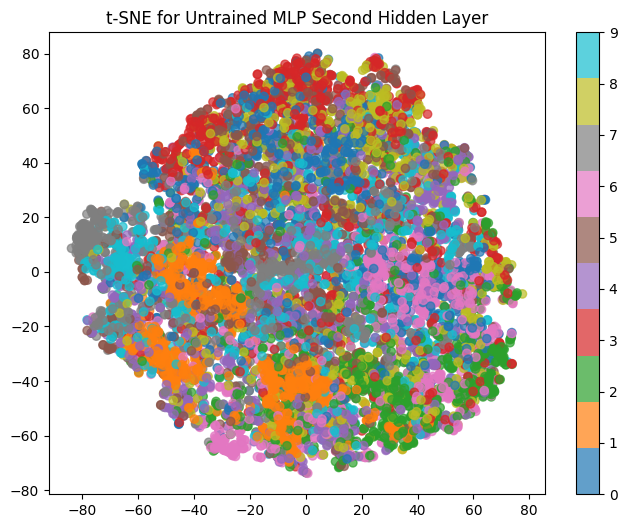

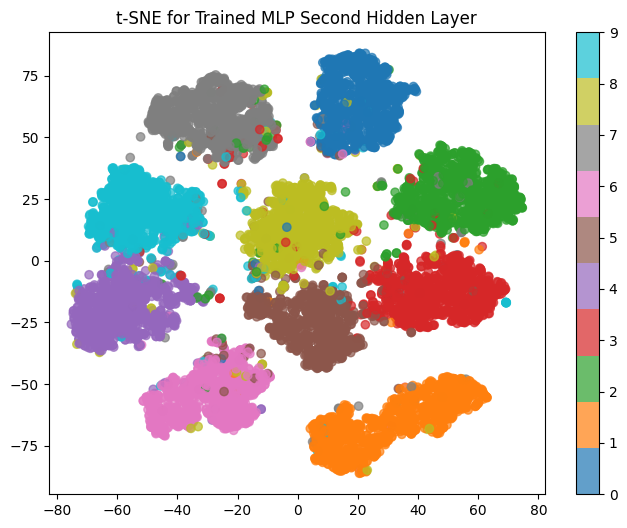

In [ ]:
y_test_labels = np.argmax(y_test_onehot, axis=1)
intermediate_layer_model = Model(inputs=mlp_model.input, outputs=mlp_model.layers[2].output)

# Step 6: Perform t-SNE on the output from the trained second hidden layer (after training)
trained_layer_output = intermediate_layer_model.predict(X_test_flat)
tsne_trained = TSNE(n_components=2, random_state=42)
trained_tsne_output = tsne_trained.fit_transform(trained_layer_output)

# Step 7: Plot t-SNE for the untrained model
plt.figure(figsize=(8, 6))
plt.scatter(untrained_tsne_output[:, 0], untrained_tsne_output[:, 1], c=y_test_labels, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title('t-SNE for Untrained MLP Second Hidden Layer')
plt.show()

# Step 8: Plot t-SNE for the trained model
plt.figure(figsize=(8, 6))
plt.scatter(trained_tsne_output[:, 0], trained_tsne_output[:, 1], c=y_test_labels, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title('t-SNE for Trained MLP Second Hidden Layer')
plt.show()
